In [89]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [94]:
img_array = cv2.imread(r"C:\Users\prajw\Documents\Ml_mini_project\Train_dataset\closed_eyes\s0002_00361_0_0_0_0_1_01.png",cv2.IMREAD_GRAYSCALE)

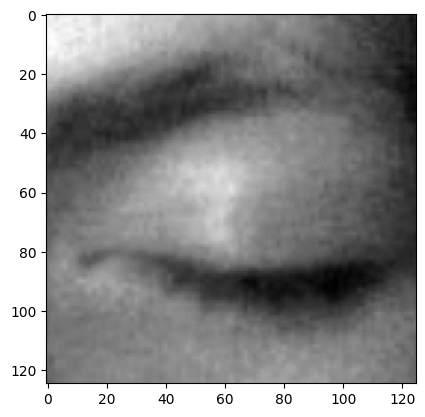

In [95]:
plt.imshow(img_array, cmap="gray")


In [96]:
img_array.shape

(125, 125)

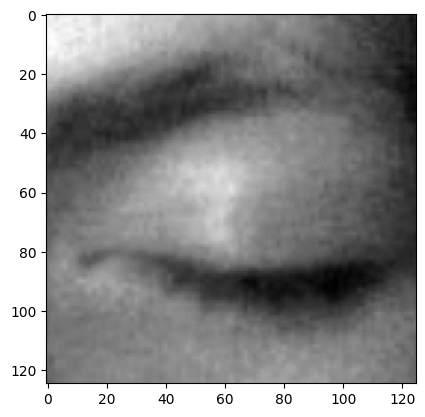

In [97]:
data_directory = r"C:\Users\prajw\Documents\Ml_mini_project\Train_dataset"
classes = ["closed_eyes","open_eyes"]
for category in classes:
    path = os.path.join(data_directory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)   
        #OpenCV provides a function called cvtColor to convert between different color spaces. The function takes two arguments: the input image and the color space conversion code.
        plt.imshow(img_array,cmap = "gray")
        plt.show()
        break
    break

In [100]:
img_array.shape

(125, 125)

Resizing the image


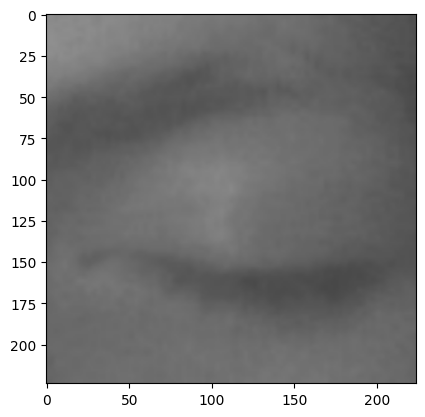

In [101]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array,cmap = "gray")
plt.show()

In [124]:
new_array.shape
# # print(len(training_data))
# # print(len(new_array))
# new_array.size

(224, 224, 3)


Reading the images and converting them into array data and lables 

In [125]:
import os
import cv2

training_data = []

def create_training_data(data_directory, classes, img_size):
    for category in classes:
        path = os.path.join(data_directory, category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass



In [104]:
# calling the fuction for trainig the dataset
create_training_data(data_directory, classes, img_size)

In [105]:
print(len(training_data))

1647


In [106]:
import random 
random.shuffle(training_data)  # to avoid the overfitting 

In [107]:
X = []
y = []

for featurs,lables in training_data:
    X.append(featurs)
    y.append(lables)
x = np.array(X).reshape(-1,img_size,img_size,3)


#28.36 

In [126]:
x.shape

(1647, 224, 224, 3)

In [109]:
X = x / 255.0  # Normalizing pixel values to the range [0, 1]

In [127]:
Y = np.array(y)

In [128]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [129]:
pickle_in = open("X.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

Deep learning model for trainig - Trainig learning


In [113]:
# !pip install keras

In [130]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [131]:
model = tf.keras.applications.mobilenet.MobileNet()

In [132]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

#  transfer learning 

In [117]:
# base_input = model.layers[0].input


In [118]:
# base_output = model.layers[-4].output

In [134]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Activation

# Define the input layer with the shape of image data
input_layer = Input(shape=(224, 224, 3))

# Add convolutional layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Flatten the output of the last convolutional layer
x = Flatten()(x)

# Add dense layers
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# Add a dense layer with one node for binary classification
output_layer = Dense(1, activation='sigmoid')(x)

# Create the model
new_model = Model(inputs=input_layer, outputs=output_layer)

# Print the summary of the new model
new_model.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │     6,422,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,520,065 (24.87 MB)

 Trainable params: 6,520,065 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

In [135]:
new_model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │     6,422,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,520,065 (24.87 MB)

 Trainable params: 6,520,065 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

set binary classification

In [136]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [137]:
new_model.fit(X,Y, epochs=10,validation_split=0.1)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 813ms/step - accuracy: 0.5864 - loss: 0.7244 - val_accuracy: 0.6242 - val_loss: 0.5929
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 779ms/step - accuracy: 0.8413 - loss: 0.3719 - val_accuracy: 0.9333 - val_loss: 0.2194
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 755ms/step - accuracy: 0.9106 - loss: 0.2447 - val_accuracy: 0.9636 - val_loss: 0.1170
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 759ms/step - accuracy: 0.9301 - loss: 0.1703 - val_accuracy: 0.9576 - val_loss: 0.1348
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 777ms/step - accuracy: 0.9716 - loss: 0.0730 - val_accuracy: 0.9636 - val_loss: 0.1145
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 779ms/step - accuracy: 0.9073 - loss: 0.2166 - val_accuracy: 0.9697 - val_loss: 0.1115
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 779ms/step - accuracy: 0.9654 - loss: 0.0964 - val_accuracy: 0.9818 - val_loss: 0.0479
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 783ms/step - accuracy: 0.9893 - loss: 0.0384 - val_accu

In [138]:
new_model.save('model.h5')

In [146]:
new_model = tf.keras.models.load_model('model.h5')

In [160]:
img_array = cv2.imread(r'C:\Users\prajw\Documents\Ml_mini_project\Train_dataset\open_eyes\s0001_02351_0_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))

In [161]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [162]:
X_input.shape

(1, 224, 224, 3)

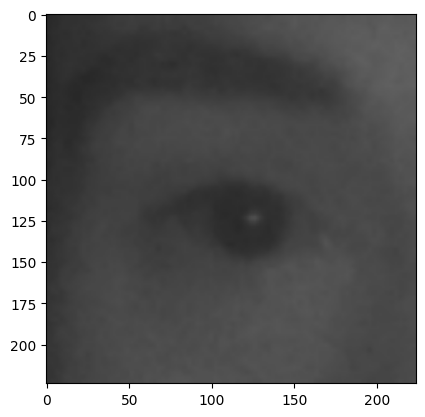

In [163]:
plt.imshow(new_array)

In [164]:
X_input = X_input/225.0

In [165]:
pridiction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [166]:
pridiction

array([[1.]], dtype=float32)

Live drowsiness detection model 


In [184]:
import cv2  ### pip install opencv-python
import numpy as np  ### pip install numpy
from tensorflow.keras.models import load_model  ### pip install tensorflow
import time
import winsound  ### For alarm sound, works on Windows

# Load the pre-trained model
new_model = load_model('model.h5')  # Replace with the actual path to your model

# Load Haar cascade files for face and eye detection
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# Variables for tracking closed eyes duration
closed_eyes_counter = 0
alarm_threshold = 30  # Number of consecutive frames with closed eyes to trigger the alarm

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
    
    status = ""
    for (x, y, w, h) in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyes_detected = eyeCascade.detectMultiScale(roi_gray)
        
        if len(eyes_detected) == 0:
            print("Eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyes_detected:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
                final_image = cv2.resize(eyes_roi, (224, 224))
                final_image = np.expand_dims(final_image, axis=0)  ## need fourth dimension
                final_image = final_image / 255.0

                Predictions = new_model.predict(final_image)
                if Predictions[0][0] > 0.5:
                    status = "Open Eyes"
                    closed_eyes_counter = 0  # Reset counter when eyes are open
                else:
                    status = "Closed Eyes"
                    closed_eyes_counter += 1  # Increment counter when eyes are closed

                cv2.putText(frame, status, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    if closed_eyes_counter > alarm_threshold:
        # Trigger alarm sound
        winsound.Beep(2500, 1000)  # Beep at 2500 Hz for 1 second
        closed_eyes_counter = 0  # Reset counter after alarmaqq

    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


TypeError: Error when deserializing class 'DepthwiseConv2D' using config={'name': 'conv_dw_1', 'trainable': True, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'depthwise_regularizer': None, 'depthwise_constraint': None}.

Exception encountered: Unrecognized keyword arguments passed to DepthwiseConv2D: {'groups': 1}